# Interface Shape Snapshots

### Import Libraries and define functions

In [1]:
#Import the necessary libraries.
import numpy as np
from numpy import loadtxt
from scipy.integrate import odeint
from scipy.special import erfc
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Use LaTeX font for plots.
plt.rcParams['text.usetex'] = True

In [2]:
#Define the function for the height of the interface.
def h_an(x,t):
    # Check if t is 0
    if t==0:
        return np.ones(x.shape)
    
    else:
        xi = x/(2*np.sqrt(t))
        return np.ones(x.shape)+(2*np.sqrt(t))*(np.exp(-xi**2)/np.sqrt(np.pi) - xi*erfc(xi))

In [3]:
# Define the system of ODEs.
def semidiscODEs2(h,t, N,dx):
    
    # Compute h_0 using the boundary condition.
    if t==0:
        h0 = 1
    else:
        # Solve the cubic for h0, which contains h1 and h2.
        # used https://en.wikipedia.org/wiki/Cubic_equation#General_cubic_formula
        
        # Order 2?
        a  = -3
        b  = -2*h[0] - h[1]
        c  = 5*h[0]**2 - 2*h[0]*h[1]
        d  = 4*h[0]**3 - h[1]*(h[0]**2) + 8*dx
        D0 = b**2 - 3*a*c
        D1 = 2*b**3 - 9*a*b*c +27*d*(a**2)
        C  = np.cbrt((D1+np.sqrt(D1**2 - 4*D0**3))/2)
        h0 = -(b + C + D0/C)/(3*a)
     
    # Give h_N.
    hN = 1
    
    # Write vectors of h, one with h_0, one with h_N.
    hl = np.concatenate((np.array([h0]),h))
    hu = np.concatenate((h,np.array([hN])))
    
    # Compute the respective fluxes.
    q = (((hu+hl)/2)**3)*(hu-hl)/dx + (hu+hl)/2
    
    # Compute dh_i/dt for each i
    dh = (q[1:]-q[:-1])/dx
    
    return dh

In [4]:
# Find the value of h_0 given the end result.
def h0(h,t, dx):
    # Solve the cubic for h0, which contains h1 and h2.
    # used https://en.wikipedia.org/wiki/Cubic_equation#General_cubic_formula
    
    # Order 2?
    a  = -3
    b  = -2*h[:,0] - h[:,1]
    c  = 5*h[:,0]**2 - 2*h[:,0]*h[:,1]
    d  = 4*h[:,0]**3 - h[:,1]*(h[:,0]**2) + 8*dx
    D0 = b**2 - 3*a*c
    D1 = 2*b**3 - 9*a*b*c + 27*d*(a**2)
    C  = np.cbrt((D1+np.sqrt(D1**2 - 4*D0**3))/2)
    h0 = -(b + C + D0/C)/(3*a)
    
    h0[0] = 1
    
    return np.array([h0]).T

### Solve Numerically

In [5]:
# Define the parameters of the system, the time array, and the space grid.
N = 2**8
XN = 2
dx = XN/N
t = np.arange(0,0.0401,0.0001)
y_init0 = np.zeros(N-1)
y_init1 = np.ones(N-1)
x = np.linspace(0,XN,N+1)

#Set up a meshgrid of x and t for the analytical solution.
x2, t2 = np.meshgrid(x, t)

In [6]:
# Solve the IVP. # Uses faster version
y2 = odeint(semidiscODEs2, y_init1, t, args=(N,dx))

# Use the boundary value to find the value at x_N
yN2 = np.array([np.ones(len(t))]).T

# Glue x_0, x_N parts to the rest of the solution.
y_num2 = np.concatenate((h0(y2,t2,dx),y2,yN2), axis=1)

### Parameters
This is because we need to convert between different nondimensionalisations.

In [7]:
# Dimensional Parameters.
rho = 1440
mu = 10
U = 0.01
H = 0.03
g = 9.81
X = (rho*g*H**3)/(3*mu*U)
T = X/U

# DNS Dimensional Parameters.
T2 = H/U

### Generate Snapshots

In [8]:
# Find the time values we want to compare at and the closest time point we have for the numerics.
t_arr = (H/X)*np.arange(0,1.8,0.2)
t_index = np.round((t_arr/0.0001),0).astype('int')

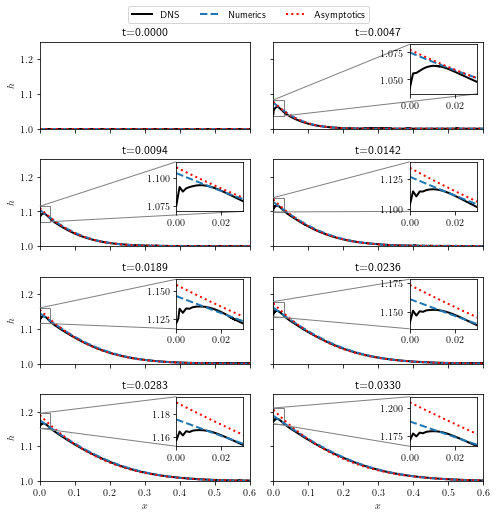

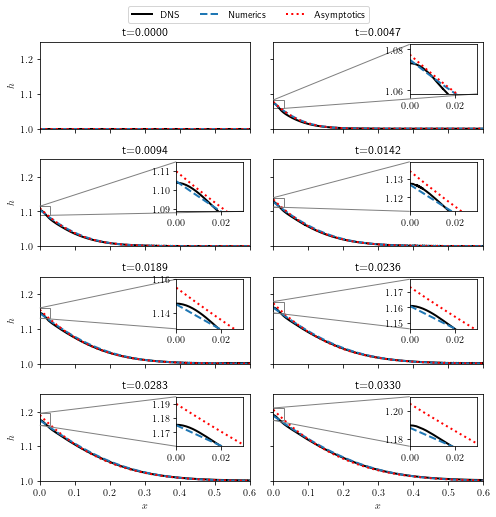

In [9]:
# Generate the snapshots in the no and free slip cases.
for slip in ('No', 'Free'):

    # Get all the data. Since they are all different sizes, using a 3D numpy array is awkward, but would be nicer.
    data0 = loadtxt('DNS '+slip+' Slip/interfacesLiquid-0.00.dat')
    data1 = loadtxt('DNS '+slip+' Slip/interfacesLiquid-0.20.dat')
    data2 = loadtxt('DNS '+slip+' Slip/interfacesLiquid-0.40.dat')
    data3 = loadtxt('DNS '+slip+' Slip/interfacesLiquid-0.60.dat')
    data4 = loadtxt('DNS '+slip+' Slip/interfacesLiquid-0.80.dat')
    data5 = loadtxt('DNS '+slip+' Slip/interfacesLiquid-1.00.dat')
    data6 = loadtxt('DNS '+slip+' Slip/interfacesLiquid-1.20.dat')
    data7 = loadtxt('DNS '+slip+' Slip/interfacesLiquid-1.40.dat')

    # Remove duplicates.
    data0 = data0[::2,:]
    data1 = data1[::2,:]
    data2 = data2[::2,:]
    data3 = data3[::2,:]
    data4 = data4[::2,:]
    data5 = data5[::2,:]
    data6 = data6[::2,:]
    data7 = data7[::2,:]

    # Rescale to my nondimensionalisation.
    data0[:,0] = data0[:,0]*(H/X)
    data1[:,0] = data1[:,0]*(H/X)
    data2[:,0] = data2[:,0]*(H/X)
    data3[:,0] = data3[:,0]*(H/X)
    data4[:,0] = data4[:,0]*(H/X)
    data5[:,0] = data5[:,0]*(H/X)
    data6[:,0] = data6[:,0]*(H/X)
    data7[:,0] = data7[:,0]*(H/X)

    # Put them in one list.
    data_all = [data0,data1,data2,data3,data4,data5,data6,data7]

    # Initialise the plot.
    fig, axs = plt.subplots(4,2, figsize=(7,7))
    
    # To work out which plot we are on.
    i=0

    # PLot curves for each time.
    for ax in axs.flat:

        # Plot curves for each method
        l1, = ax.plot(data_all[i][:,0],data_all[i][:,1], linewidth=2,  color='black') # DNS
        l2, = ax.plot(x, y_num2[t_index[i],], '--', linewidth=2, color='tab:blue') # my numerics
        l3, = ax.plot(x, h_an(x,t_arr[i]), ':', linewidth=2, color='red') # asymptotics
        
        # Add an inset to each of the plots, except the first.
        if i!=0:
            j=1
            if slip=="Free":
                j=3
            axins = ax.inset_axes([0.65, 0.4, 0.32, 0.57], xlim=(0, 0.03), ylim=(data_all[i][0,1]-0.005*j, max(h_an(x,t_arr[i]))+0.005))
            axins.plot(data_all[i][:,0],data_all[i][:,1], linewidth=2,  color='black') # DNS
            axins.plot(x, y_num2[t_index[i],], '--', linewidth=2, color='tab:blue') # my numerics
            axins.plot(x, h_an(x,t_arr[i]), ':', linewidth=2, color='red') # asymptotics
            if i<3:
                mark_inset(ax, axins, loc1=2, loc2=4,fc="none", ec="0.5")
            else:
                mark_inset(ax, axins, loc1=2, loc2=3,fc="none", ec="0.5")
                
        # Add the time as a title in the form 0.WXYZ.
        t_title = str(round(t_arr[i],4))
        while len(t_title)<6:
            t_title = t_title+str(0)   
        ax.set_title(r't=s1'.replace('s1',t_title))

        # Add details
        ax.tick_params(axis='both', which='major')

        ax.set_xlim(0,0.6)
        ax.set_xlabel(r'$x$')

        ax.set_ylim(1,1.25)
        ax.set_ylabel(r'$h$')
        
        ax.label_outer()
        
        # Move to next plot.
        i = i+1


    fig.tight_layout()
    fig.legend((l1,l2,l3), (r'DNS', r'Numerics', r'Asymptotics'), loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=3, fontsize=10)
    plt.savefig('Snapshots_'+slip+'_Slip', bbox_inches='tight', dpi=500)
    plt.show()